In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots appear inside notebook
%matplotlib inline


In [2]:
# Load IPL dataset
df = pd.read_csv('C:/Users/AMUTHA/Desktop/cricket-match-data-analysis-2008-2025/data/matches.csv')  # adjust path if needed

# Show first 5 rows
df.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
# Keep only seasons between 2008 and 2025
df = df[(df['season'] >= 2008) & (df['season'] <= 2025)]

# Check number of matches
print("Total Matches (2008–2025):", df.shape[0])


Total Matches (2008–2025): 756


In [4]:
# Check columns
print(df.columns)

# Check missing values
print(df.isnull().sum())

# Unique teams
print("Teams:", df['team1'].unique())


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64
Teams: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Del

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: count, dtype: int64


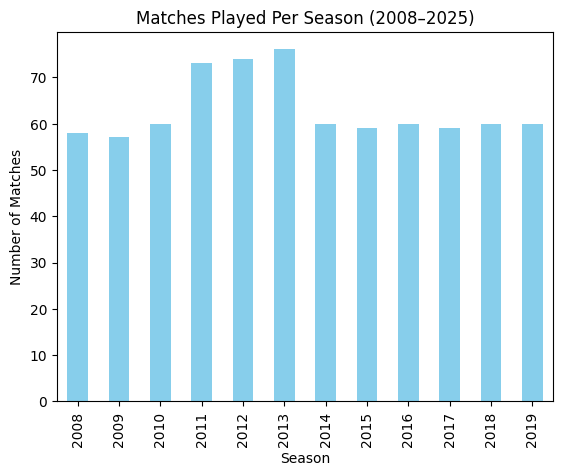

In [5]:
# Matches played per season
matches_per_season = df['season'].value_counts().sort_index()
print(matches_per_season)

# Plot
matches_per_season.plot(kind='bar', color='skyblue')
plt.title("Matches Played Per Season (2008–2025)")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.show()


winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Name: count, dtype: int64


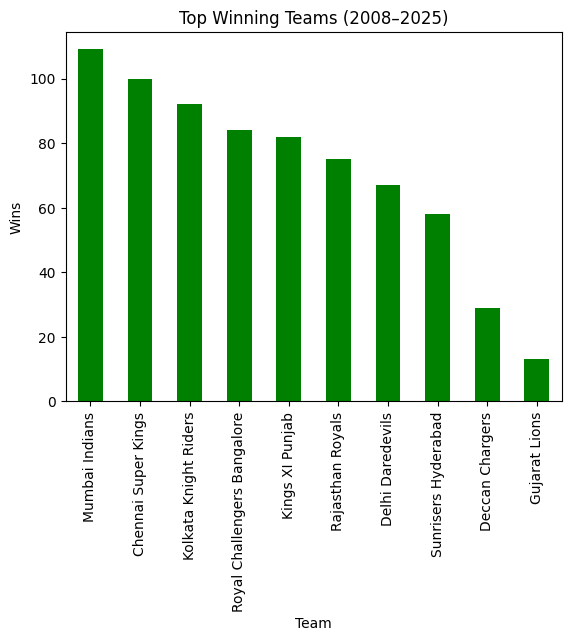

In [6]:
# Count of wins by team
team_wins = df['winner'].value_counts().head(10)
print(team_wins)

# Plot
team_wins.plot(kind='bar', color='green')
plt.title("Top Winning Teams (2008–2025)")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.show()


In [7]:
# How often toss winner also wins match
toss_winner_matches = df[df['toss_winner'] == df['winner']]
print("Matches where toss winner won match:", toss_winner_matches.shape[0])

# Percentage
percentage = (toss_winner_matches.shape[0] / df.shape[0]) * 100
print("Percentage of matches toss winner won:", round(percentage, 2), "%")


Matches where toss winner won match: 393
Percentage of matches toss winner won: 51.98 %


toss_decision
field    463
bat      293
Name: count, dtype: int64


C:\Users\AMUTHA\AppData\Local\Temp\ipykernel_13524\2000094144.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='toss_decision', data=df, palette='pastel')


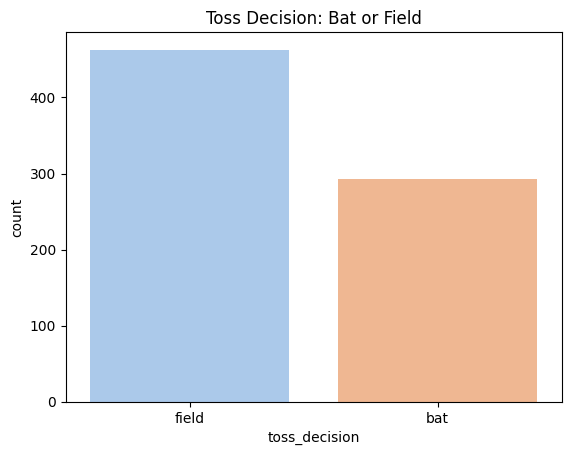

In [8]:
# Count toss decision
toss_decision = df['toss_decision'].value_counts()
print(toss_decision)

# Plot
sns.countplot(x='toss_decision', data=df, palette='pastel')
plt.title("Toss Decision: Bat or Field")
plt.show()


venue
Eden Gardens                                  77
M Chinnaswamy Stadium                         73
Wankhede Stadium                              73
Feroz Shah Kotla                              67
Rajiv Gandhi International Stadium, Uppal     56
MA Chidambaram Stadium, Chepauk               49
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Maharashtra Cricket Association Stadium       21
Subrata Roy Sahara Stadium                    17
Name: count, dtype: int64


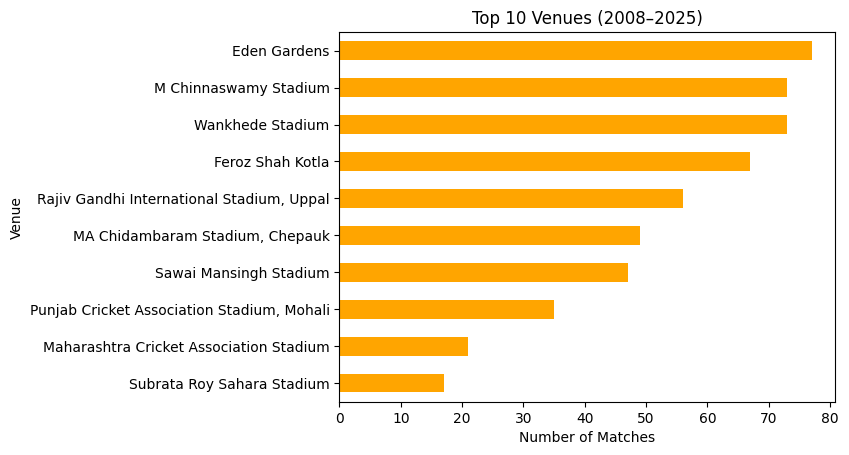

In [9]:
# Top venues by number of matches
top_venues = df['venue'].value_counts().head(10)
print(top_venues)

# Plot
top_venues.plot(kind='barh', color='orange')
plt.title("Top 10 Venues (2008–2025)")
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.gca().invert_yaxis()  # Highest on top
plt.show()
